In [1]:
from models.kmeans_classifier import KMeansClassifier
from models.knn_classifier import KNNClassifier

#k_means = KMeansClassifier()
knn = KNNClassifier()


In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.add_subplot(121)
plt.imshow(k_means.train_data[72], cmap='gray')

# fig.add_subplot(122)
# plt.imshow(knn.train_data[40], cmap='gray')

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./tornillo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# img_vec, centroids, category, object_length, images_dict = k_means.predict([gray])
img_vec, category, object_length, images_dict = knn.predict([gray])

print(category, object_length)

fig = plt.figure(figsize=(10, 8))

fig.add_subplot(331)
plt.imshow(gray, cmap='gray')

fig.add_subplot(332)
plt.imshow(images_dict["Escala de grises"], cmap='gray')

fig.add_subplot(333)
plt.imshow(images_dict["Binarizacion"], cmap='gray')

fig.add_subplot(334)
plt.imshow(images_dict["Cierre"], cmap='gray')

fig.add_subplot(335)
plt.imshow(images_dict["Apertura"], cmap='gray')

fig.add_subplot(336)
plt.imshow(images_dict["Imagen con Bounding Box"], cmap='gray')

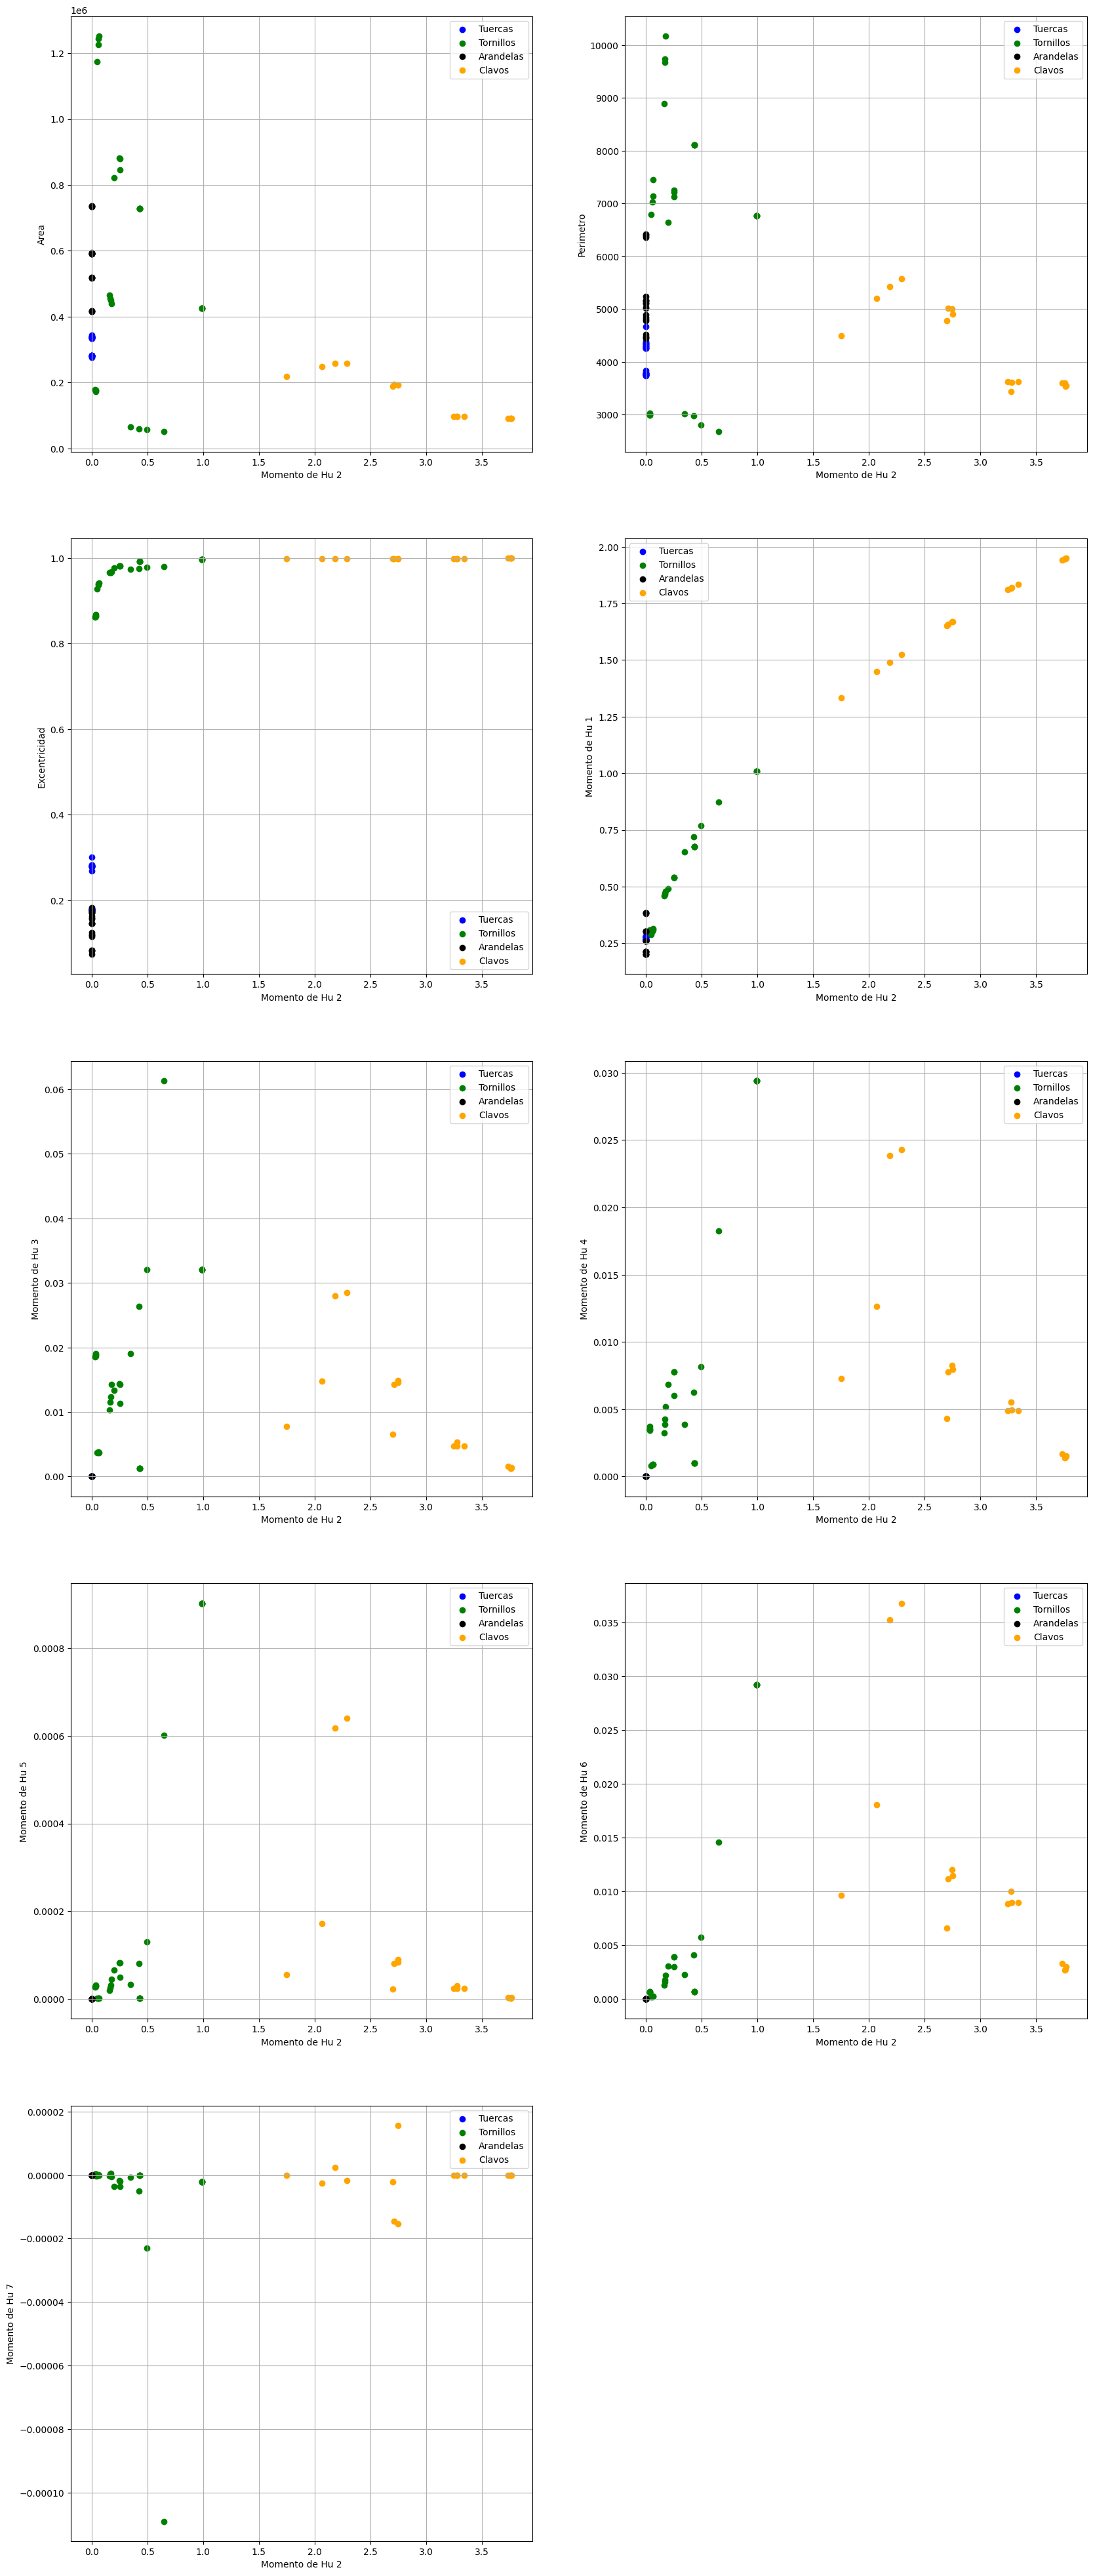

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 50))

features_labels = ["Area", "Excentricidad", "Momento de Hu 1", "Momento de Hu 2", "Momento de Hu 3", "Momento de Hu 4", "Momento de Hu 5", "Momento de Hu 6", "Momento de Hu 7"]
feature_1 = 4

features = [i for i in range(len(features_labels))]
features.remove(feature_1)
feature_1_label = features_labels[feature_1]
features_labels.remove(features_labels[feature_1])

for i, (feature_2, label) in enumerate(zip(features, features_labels)):

    ax = fig.add_subplot(5, 2, i+1)
    # Define the x, y, and z coordinates
    tuercas_x = knn.train_images[0:24, feature_1]
    tuercas_y = knn.train_images[0:24, feature_2]

    tornillos_x = knn.train_images[24:52, feature_1]
    tornillos_y = knn.train_images[24:52, feature_2]

    arandelas_x = knn.train_images[52:72, feature_1]
    arandelas_y = knn.train_images[52:72, feature_2]

    clavos_x = knn.train_images[72:, feature_1]
    clavos_y = knn.train_images[72:, feature_2]

    # Create the scatter plot
    ax.scatter(tuercas_x, tuercas_y, c='blue', label="Tuercas")
    ax.scatter(tornillos_x, tornillos_y, c='green', label="Tornillos")
    ax.scatter(arandelas_x, arandelas_y, c='black', label="Arandelas")
    ax.scatter(clavos_x, clavos_y, c='orange', label="Clavos")
    ax.set_xlabel(feature_1_label)
    ax.set_ylabel(label)
    ax.legend()
    ax.grid(True)

    # for centroid, color in zip(centroids, ['red', 'green', 'black', 'orange']):
    #     ax.scatter(centroid[0], centroid[2], c=color)

# Add labels and title
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')

# Display the plot
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math
from skimage.morphology import disk
from skimage import exposure
from skimage.filters import threshold_yen, threshold_mean, threshold_triangle, rank, threshold_isodata
from skimage.measure import label, regionprops

from skimage.morphology import reconstruction

gray = k_means.train_data[73]
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply filter
gamma_corrected = exposure.adjust_sigmoid(gray)

# Binarize image
thresh = threshold_triangle(gray)
image = gray > thresh
image_bw = image.astype(np.uint8) * 255

# Closing
image_close = cv2.erode(cv2.dilate(image_bw, kernel, iterations=1), kernel, iterations=1)
# Opening
image_open = cv2.dilate(cv2.erode(image_close, kernel, iterations=1), kernel, iterations=1)

# Labeling (identify objects)
label_image = label(image_open)
# Get properties of objects
regions = regionprops(label_image)

# Get the biggest object and its properties
area = 0
for props in regions:
    if props.area > area:
        main_label = props.label
        endpoints = props.bbox
        area = props.area
        # perimeter = props.perimeter
        # eccentricity = props.eccentricity 
        # moments_hu = props.moments_hu

        orientation = props.orientation

        # length = props.feret_diameter_max

        # y0, x0 = props.centroid
        # orientation = props.orientation
        # x2 = x0 - math.sin(orientation) * -0.5 * props.axis_major_length
        # y2 = y0 - math.cos(orientation) * -0.5 * props.axis_major_length
        # x3 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
        # y3 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

# Remove the biggest object from the image
label_image[label_image != main_label] = 0

print(math.degrees(orientation))
fig = plt.figure(figsize=(10, 10))

# fig.add_subplot(331)
# plt.imshow(gray, cmap='gray')

# fig.add_subplot(332)
# plt.imshow(gamma_corrected, cmap='gray')

# fig.add_subplot(333)
# plt.imshow(image_bw, cmap='gray')

# fig.add_subplot(334)
# plt.imshow(image_close, cmap='gray')

fig.add_subplot(121)
plt.imshow(label_image, cmap='gray')
minr, minc, maxr, maxc = endpoints
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
plt.plot(bx, by, '-b', linewidth=2.5)


length = k_means.calculate_length(image_open, orientation)

fig.add_subplot(122)
# plt.imshow(rotated_img, cmap='gray')
minr, minc, maxr, maxc = endpoints
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
plt.plot(bx, by, '-b', linewidth=2.5)

print(minr, minc, maxr, maxc)
print(length)


In [ ]:
from skimage.filters import try_all_threshold

img = cv2.imread('../images/regla.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = try_all_threshold(gray, figsize=(10, 8), verbose=False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import cv2
import math
import numpy as np
from skimage import exposure
from skimage.filters import threshold_li
from skimage.measure import label, regionprops

img = cv2.imread('../images/regla.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_size = 7
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Apply filter
gamma_corrected = exposure.adjust_sigmoid(gray)

# Binarize image
thresh = threshold_li(gray)
image = gray > thresh
image_bw = image.astype(np.uint8) * 255

# Closing
image_close = cv2.erode(cv2.dilate(image_bw, kernel, iterations=1), kernel, iterations=1)
# Opening
image_open = cv2.dilate(cv2.erode(image_close, kernel, iterations=1), kernel, iterations=1)

# Labeling (identify objects)
label_image = label(image_open)
# Get properties of objects
regions = regionprops(label_image)


# Get the biggest object and its properties
area = 0
for props in regions:
    if props.area > area:
        main_label = props.label
        endpoints = props.bbox
        area = props.area
        perimeter = props.perimeter
        eccentricity = props.eccentricity 
        moments_hu = props.moments_hu
        orientation = props.orientation

        length = props.axis_major_length


label_image[label_image != main_label] = 0

fig = plt.figure(figsize=(10, 10))

fig.add_subplot(121)
plt.imshow(image_open, cmap='gray')
minr, minc, maxr, maxc = endpoints
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
plt.plot(bx, by, '-b', linewidth=2.5)


length, length1, rotated_img, endpoints = calculate_length(image_open, orientation)
fig.add_subplot(122)
plt.imshow(rotated_img, cmap='gray')
minr, minc, maxr, maxc = endpoints
bx = (minc, maxc, maxc, minc, minc)
by = (minr, minr, maxr, maxr, minr)
plt.plot(bx, by, '-b', linewidth=2.5)

print(minr, minc, maxr, maxc)
print(length)
print(length1)

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

from skimage.draw import ellipse
from skimage.measure import label, regionprops, regionprops_table
from skimage.transform import rotate


image = np.zeros((600, 600))

rr, cc = ellipse(300, 350, 100, 220)
image[rr, cc] = 1

image = rotate(image, angle=15, order=0)

rr, cc = ellipse(100, 100, 60, 50)
image[rr, cc] = 1

label_img = label(image)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    # x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    # y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    # ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 600, 600, 0))
plt.show()